# Problem Definition.
Buiding a classification problem to determine if a person will have heart disease or not.

# Data.
The dataset was taken from kaggle and can be accessed through the provided link https://www.kaggle.com/ronitf/heart-disease-uci.

# Evaluation.
If we are able to evaluate or train our model to get an accuracy score of 85% and with high precion, recall and f1 score between the range 60% and 85% then our model is ready to go into production.

# Features.
The heart disease features and list ted bellow and can also be retrieved from the link provided above or this one https://www.kaggle.com/ronitf/heart-disease-uci.<br>
age<br>
sex<br>
chest pain type (4 values)<br>
resting blood pressure<br>
serum cholestoral in mg/dl<br>
fasting blood sugar > 120 mg/dl<br>
resting electrocardiographic results (values 0,1,2)<br>
maximum heart rate achieved<br>
exercise induced angina<br>
oldpeak = ST depression induced by exercise relative to rest<br>
the slope of the peak exercise ST segment<br>
number of major vessels (0-3) colored by flourosopy<br>
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>

# Setting our tools up

In [1]:
#Import neccesary libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import scikit learn libries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.inspection import permutation_importance
import pickle

# Performing Exploratory data analysis(Getting our data ready).

In [2]:
#Import Dataset
heart_dis = pd.read_csv("heart.csv")

#Display dataset head
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
#check for Nan values
heart_dis.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [86]:
#Checking for Non numeric types
heart_dis.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Our dataset does not contain any **Null** and **Non numeric** types.

In [87]:
#Check value counts of dependent variable(target)
heart_dis['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

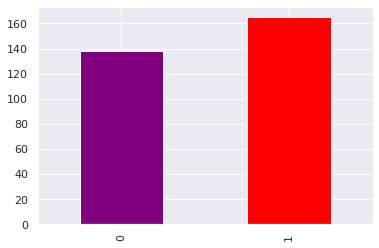

In [194]:
#Lets try to visualize the above results
heart_dis['target'].value_counts().plot(kind='bar', color=['red','purple'])
plt.show()

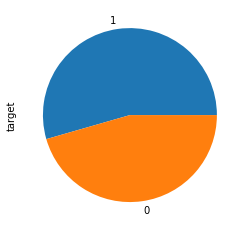

In [5]:
#Lets try to visualize it in pie chart form
heart_dis['target'].value_counts().plot(kind='pie')
plt.show()

In [89]:
#Let's find out the difference between the target variable
print(f"The diference between 1 and 0 in target variable is {165-138}")

The diference between 1 and 0 in target variable is 27


From the above the difference between 0 and 1 is 27 which is not that huge but still the dataset is inbalance.We will solve this when we start working on our dataset.

In [90]:
#Lets find the correlation between the features in the dataset
heart_dis.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [297]:
#Lets display the five summary(min, max, lower quatile, upper quatile and the median) also
#with other informations such as the count, mean and standard devuation of each features.
heart_dis.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


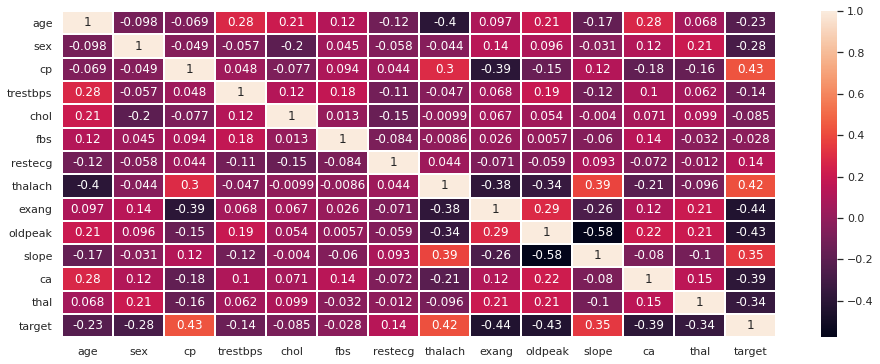

In [300]:
#Using heatmap to visualize highly correlated features with threshold of 95% and remove them all
heart_cor = heart_dis.corr()
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
sns.heatmap(heart_cor, annot=True, square=False, linewidths=1)
plt.show()

Our correlation threshold is **95%** but from the above the correlation between the features are not high. Hence there is **low negative and positive correlation** in our dataset. Since it does not meet our threshold we cannot delete/remove any features from our datasets.

In [6]:
#Split data into features and labels thats x=independent variables and y=dependent variable
x=heart_dis.drop('target', axis=1)
y=heart_dis['target']

In [93]:
#Display y values
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [94]:
#Display x values
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# Feature Selection.
Now that we are done exploring our dataset, we are going to perform our feature selections thats taking the most relevant features to be used in our model using the filtering technique(removing all **Constant**, **Quasi**, and **Duplicated features**). We are going to use **VarianceThreshold** from sklearn feature selection.

# Constant features.
Constant features are fetures having one magnitude or value thats if it contains 1, it will be one throughout.

In [95]:
#initialize variance threshold
filtering_const = VarianceThreshold(threshold=0)

#Fit our threshold
filtering_const.fit(x)

VarianceThreshold(threshold=0)

In [96]:
#Display constant features as false and non constant features as true
filtering_const.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

from the above there are no constant features in our dataset hence only non constant features. Lets try to print the non constant features and have a look. Its just like using the x.columns to display it.

In [97]:
x.columns[filtering_const.get_support()]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Quasi Features.
Quasi features are features with almost constant features.

In [98]:
#Initiallize quasi feature
filter_quasi = VarianceThreshold(threshold=0.09)

#Fit Quasi feature
filter_quasi.fit(x)

VarianceThreshold(threshold=0.09)

In [99]:
#Display quasi features as false and non constant features as true
filter_quasi.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

from the above there are no Quasi features in our dataset hence only non Quasi features. Lets try to print the non Quasi features and have a look. Its just like using the x.columns to display it.

# Duplicated Features
Duplicated features are features containing the same values.

In [100]:
#Lets transpose our x dataset
x_t = x.T

#Display transposed dataset
x_t

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0


Before we can remove all duplicated features in our dataset, we have to first transpose our data because there is a libry in pandas that can deal with duplicated data row by row. After we are done, we will just transpose it back to its normal state. **Note:** there is no libry in pandas that deal with duplicated data in a feature yet. 

In [101]:
#Lets check for duplicated values in our dataset using pandas in built function
x_t.duplicated().sum()

0

from the above, we can see that there are no duplicated values in our dataset. **Conclution:** We will be using all features in our algorithm because non of them contains **Constant values**, **Quasi vallues** and **Duplicated values**.

Before we start building our model, we have to make our dataset balanced. During our data exploratory, we discovered that our dataset is imbalanced. We will balance it using under_sampling technique. Let's first split our dataset into training and testing.

In [7]:
#Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [107]:
#Now lets balance our dataset
bal_dataset = NearMiss()

#Reduce imbalance dataset
x_train_bal, y_train_bal = bal_dataset.fit_sample(x_train, y_train)

#Display before and after handling imbalance dataset
print(f"Before imbalance dataset {len(y_train)}")
print(f"Afetr imbalance dataset {len(y_train_bal)}")

Before imbalance dataset 242
Afetr imbalance dataset 216


As we can see, we have been able to make the dataset balanced. Now lets create our model.

# Choosing the right estimator to use.
from this url https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html from scikit learn roadmap in choosing an estimator. We will start with RandomForestClassifier. 

# Fit and Make prediction
In this stage we will fit our model and make a prediction out from it using a function inother to reuse it to build other our model with other estimators case it doesnt work

In [112]:
#Initialize our algorithm
clf = RandomForestClassifier()
    
#Fit algorithm
clf.fit(x_train_bal, y_train_bal)

#Make prediction
clf_pred = clf.predict(x_test)

#Display
clf_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [125]:
#Create a function to evaluate our model
def evaluateModel(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    cvs = np.mean(cross_val_score(clf, x, y, cv=5)) #without scoring parameter
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    modelevaluate = {
        "Accusracy score": round(accuracy,2),
        "cross val score": round(cvs,2),
        "precision score": round(precision,2),
        "recall score": round(recall,2),
        "f1 score": round(f1,2)
    }
    
    print(f"The accuracy score is {accuracy * 100:.2f}%")
    print(f"The cross val score is {cvs * 100:.2f}%")
    print(f"The precision score is {precision * 100:.2f}%")
    print(f"The recall score is {recall * 100:.2f}%")
    print(f"The f1 score is {f1 * 100:.2f}%")
    
    return modelevaluate

In [127]:
#Evaluating our model(Base line prediction)
base_prediction = evaluateModel(y_test, clf_pred)

#Evaluate model
base_prediction

The accuracy score is 72.13%
The cross val score is 82.17%
The precision score is 68.42%
The recall score is 83.87%
The f1 score is 75.36%


{'Accusracy score': 0.72,
 'cross val score': 0.82,
 'precision score': 0.68,
 'recall score': 0.84,
 'f1 score': 0.75}

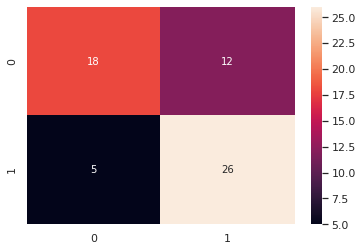

In [294]:
#Let's visualize our evaluated model using heatmap and confusion matrics
conf_mat = confusion_matrix(y_test, clf_pred)
sns.heatmap(conf_mat, annot=True)
plt.show()

From the heatmap confusion matrics out of those Positively, only 26 were predicted correctly and 5 where wrong. And out of those predicted Nagatively only 18 were predicted correctly and 9 were predicted wrongly.

# Let's imporove uporn our model(RandomizedSearchCV)
We will imporove uporn our model using RandomisedSearchedCv first.

In [132]:
grid = {
    'n_estimators': [10, 100, 200, 500, 1000, 1200],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['auto','sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

#Set random seed to 42
np.random.seed(42)

#Initiate RandomForestClassifier
clf_rs = RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf_rs,
                           param_distributions=grid,
                           n_iter=5, # number of models to try
                           cv=10,
                           verbose=2)
rs_clf.fit(x_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=Non

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, m

[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   2.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   2.2s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   50.7s finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=1), n_iter=5,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [176]:
#Display the best params that will be used to make prediction
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [136]:
#Display the estimators
rs_clf.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=500, n_jobs=1)

In [285]:
#Make prediction
rs_predicts = rs_clf.predict(x_test)

#Display predicted result
rs_predicts

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [286]:
#Lets evaluate our model
rs_predict = evaluateModel(y_test, rs_predicts)

#Display Evaluation
rs_predict

The accuracy score is 78.69%
The cross val score is 83.15%
The precision score is 75.00%
The recall score is 87.10%
The f1 score is 80.60%


{'Accusracy score': 0.79,
 'cross val score': 0.83,
 'precision score': 0.75,
 'recall score': 0.87,
 'f1 score': 0.81}

In [288]:
confusion_matrix(y_test, rs_predicts)

array([[21,  9],
       [ 4, 27]])

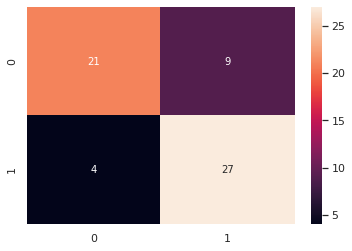

In [290]:
#Let's visualize our evaluated model using heatmap and confusion matrics
conf_mat = confusion_matrix(y_test, rs_predicts)
sns.heatmap(conf_mat, annot=True)
plt.show()

From the heatmap confusion matrics out of those **Positively**, only **27** were predicted correctly and **4** where wrong. And out of those predicted **Nagatively** only 21 were predicted correctly and **9** were predicted wrongly.

# Let's imporove uporn our model again with(GridSearchCV)
We will imporove uporn our model using GridSearchedCv first.

In [219]:
grid_2 = {
        'n_estimators': [100, 200],
        'min_samples_split': [4,6],
        'min_samples_leaf': [3,2],
        'max_features': ['sqrt','auto'],
        'max_depth': [20,40],
}

#Set random seed to 42
np.random.seed(42)

#Initiate RandomForestClassifier
clf_gs = RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=10,
                           verbose=2)
gs_clf.fit(x_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=sqrt, min_samples_le

[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=40, max_features=sqrt, min_samples_le

[CV]  max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=40, max_features=auto, min_samples_le

[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=40, max_features=auto, min_samples_le

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 40],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [3, 2],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [220]:
#Get best parameter
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [221]:
#Get the best estimator
gs_clf.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=6)

In [291]:
#Make prediction
gs_predicts = gs_clf.predict(x_test)

#Display predicted values
gs_predicts

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [292]:
#Make evaluation
gs_predict = evaluateModel(y_test, gs_predicts)

#Display predicted result
gs_predict

The accuracy score is 75.41%
The cross val score is 82.16%
The precision score is 73.53%
The recall score is 80.65%
The f1 score is 76.92%


{'Accusracy score': 0.75,
 'cross val score': 0.82,
 'precision score': 0.74,
 'recall score': 0.81,
 'f1 score': 0.77}

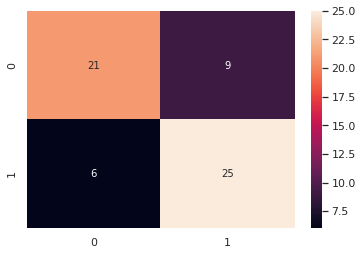

In [293]:
#Let's visualize our evaluated model using heatmap and confusion matrics
conf_mat = confusion_matrix(y_test, gs_predicts)
sns.heatmap(conf_mat, annot=True)
plt.show()

From the heatmap confusion matrics out of those Positively, only 25 were predicted correctly and 6 where wrong. And out of those predicted Nagatively only 21 were predicted correctly and 9 were predicted wrongly.

# Now lets display all our evaluation and draw conclusions out of it.

In [224]:
#Display base evaluated result
base_prediction

{'Accusracy score': 0.72,
 'cross val score': 0.82,
 'precision score': 0.68,
 'recall score': 0.84,
 'f1 score': 0.75}

In [225]:
#Display Randomized search evaluation
rs_predict

{'Accusracy score': 0.79,
 'cross val score': 0.82,
 'precision score': 0.75,
 'recall score': 0.87,
 'f1 score': 0.81}

In [226]:
#Display Grid Search evaluation
gs_predict

{'Accusracy score': 0.75,
 'cross val score': 0.82,
 'precision score': 0.74,
 'recall score': 0.81,
 'f1 score': 0.77}

In [227]:
#Create data frame from the evaluated metrics
evaluated_metrics = pd.DataFrame({
    "Base Line Prediction": base_prediction,
    "Randomized Search": rs_predict,
    "Grid Search": gs_predict
})

In [228]:
#Display evaluated metrics
evaluated_metrics

,Base Line Prediction,Randomized Search,Grid Search
Accusracy score,0.72,0.79,0.75
cross val score,0.82,0.82,0.82
precision score,0.68,0.75,0.74
recall score,0.84,0.87,0.81
f1 score,0.75,0.81,0.77


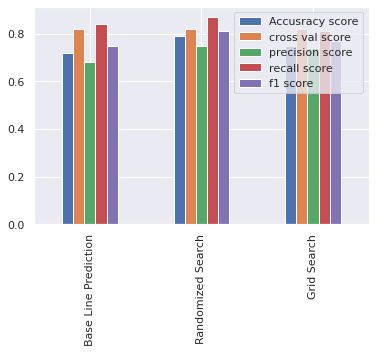

In [229]:
#Lets visualize our evaluated result
evaluated_metrics.T.plot(kind='bar')
plt.show()

### Random forest feature importance

In [231]:
clf.feature_importances_

array([0.08645635, 0.03843492, 0.17250921, 0.07280533, 0.08345948,
       0.00626739, 0.02293827, 0.10402868, 0.05851189, 0.13031582,
       0.03936859, 0.10394178, 0.08096227])

In [246]:
#let's assign the features names with with their corresponding feature importance
dict(zip(x_train.columns, list(clf.feature_importances_)))

{'age': 0.08645635299540737,
 'sex': 0.038434924331593165,
 'cp': 0.1725092110786702,
 'trestbps': 0.07280533440072046,
 'chol': 0.08345947802306668,
 'fbs': 0.006267391046677382,
 'restecg': 0.022938267542580975,
 'thalach': 0.10402868191606682,
 'exang': 0.0585118936883085,
 'oldpeak': 0.13031582308854972,
 'slope': 0.039368593578584764,
 'ca': 0.10394177955805321,
 'thal': 0.08096226875172063}

### Randomized searched cv feature importance

In [232]:
rs_clf.best_estimator_.feature_importances_

array([0.08034808, 0.04409051, 0.16679547, 0.07002365, 0.07704502,
       0.00972623, 0.0202036 , 0.12404314, 0.07943606, 0.11316364,
       0.04152635, 0.10599507, 0.06760319])

In [247]:
#let's assign the features names with with their corresponding feature importance
dict(zip(x_train.columns, rs_clf.best_estimator_.feature_importances_ ))

{'age': 0.08034808142407891,
 'sex': 0.044090512974509,
 'cp': 0.16679546831489392,
 'trestbps': 0.07002364859130833,
 'chol': 0.07704501564121728,
 'fbs': 0.009726233423930256,
 'restecg': 0.02020360381931221,
 'thalach': 0.12404313552142693,
 'exang': 0.07943605819236722,
 'oldpeak': 0.11316364349986131,
 'slope': 0.04152634528852885,
 'ca': 0.1059950653291659,
 'thal': 0.06760318797939999}

### Grid search cv feature importance

In [236]:
gs_clf.best_estimator_.feature_importances_

array([0.07289035, 0.04211273, 0.19842682, 0.05546384, 0.05317286,
       0.00772644, 0.01448532, 0.11894782, 0.08818657, 0.11548821,
       0.0398313 , 0.11016825, 0.0830995 ])

In [237]:
dict(zip(x_train.columns, list(gs_clf.best_estimator_.feature_importances_)))

{'age': 0.07289034687572682,
 'sex': 0.04211272754650344,
 'cp': 0.19842681960518518,
 'trestbps': 0.05546383653864857,
 'chol': 0.053172862473469786,
 'fbs': 0.007726444840114876,
 'restecg': 0.01448531849443873,
 'thalach': 0.11894782194274979,
 'exang': 0.08818656589156909,
 'oldpeak': 0.11548820891642057,
 'slope': 0.039831303161338705,
 'ca': 0.11016824579411624,
 'thal': 0.08309949791971824}

In [248]:
#let's create a dataframe out of our feature importance results and visualize it
feat_import = pd.DataFrame({
    "Base Line Feature Importance": dict(zip(x_train.columns, list(clf.feature_importances_))),
    "Randomized Search CV Feat Import": dict(zip(x_train.columns, rs_clf.best_estimator_.feature_importances_ )),
    "Grid Search CV Feat Import" : dict(zip(x_train.columns, list(gs_clf.best_estimator_.feature_importances_)))
})

In [315]:
#Lets display our results feature importance dataframe
feat_import

,Base Line Feature Importance,Randomized Search CV Feat Import,Grid Search CV Feat Import
age,0.086456,0.080348,0.072890
sex,0.038435,0.044091,0.042113
cp,0.172509,0.166795,0.198427
trestbps,0.072805,0.070024,0.055464
chol,0.083459,0.077045,0.053173
fbs,0.006267,0.009726,0.007726
restecg,0.022938,0.020204,0.014485
thalach,0.104029,0.124043,0.118948
exang,0.058512,0.079436,0.088187
oldpeak,0.130316,0.113164,0.115488


<Figure size 6480x1440 with 0 Axes>

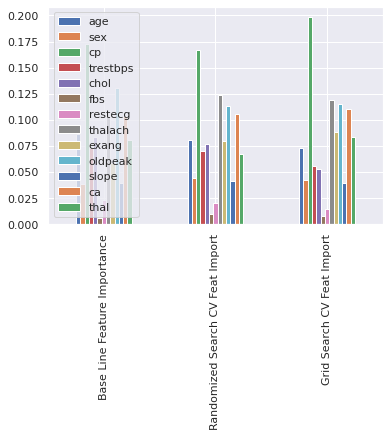

In [266]:
#Lets virsualize our result
feat_import.T.plot(kind='bar');
plt.show()

# Using permutation to visualize our most important features
The permutation-based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. It is implemented in scikit-learn as permutation_importance method. As arguments it requires trained model (can be any model compatible with scikit-learn API) and validation (test data). This method will randomly shuffle each feature and compute the change in the model's performance. The features which impact the performance the most are the most important one. 

## Note: 
The permutation-based importance is computationally expensive. The permutation-based    method can have problems with highly-correlated features, it can report them as unimportant. Hence you have to deal with highly correlated features before using this method.

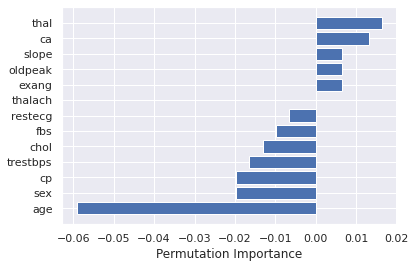

In [274]:
#Feature importance for baseline using permutation
perm_importance = permutation_importance(clf, x_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(x_train.columns, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

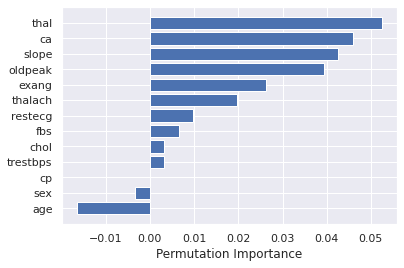

In [276]:
#Feature importance for Randomized Search Cv permutation
perm_importance = permutation_importance(rs_clf, x_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(x_train.columns, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

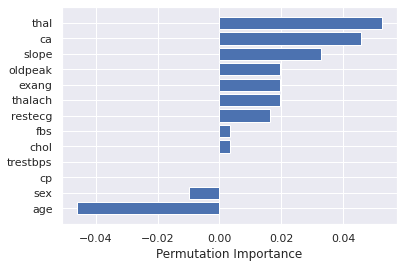

In [277]:
#Feature importance for Grid Search Cv using permutation
perm_importance = permutation_importance(gs_clf, x_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(x_train.columns, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

## Lets save our model and reuse it to make predictions.
We will save our model using pickle inother to reuse our model again without re-running the entire application from scratch again. Before that lets place our accuracy score in a dataframe variable, display it and visualize it.

In [327]:
#Saving base line model
pickle.dump(clf, open("baseline-model.pkl","wb"))

#Saving randomized search cv model
pickle.dump(rs_clf, open("rs_clf.pkl","wb"))

#Saving grid search cv model
pickle.dump(gs_clf, open("gs_clf.pkl","wb"))

In [3]:
#load and test our saved model
baseline_final = pickle.load(open("baseline-model.pkl","rb"))
rs_clf_final = pickle.load(open("rs_clf.pkl","rb"))
gs_clf_final = pickle.load(open("gs_clf.pkl","rb"))

In [8]:
#Test our model(baseline)
baseline_final.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [333]:
#Test our model(randomized search cv)
rs_clf_final.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [334]:
#Test our model(grid search cv)
gs_clf_final.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

# Conclusion:
Finally we have come to an end of building our model. We had an accuracy score for Baseline prediction= **0.72** and Randomized searched cv= **0.79** and Grid search cv= **0.75**.We just have to pick one, thats the one with the highest Accuracy score but should also consider **Precision, recall and f1 score** before selecting the highest accuracy score.
## Note:
We can still improve our model by:
* Getting more data.
* Trying different Algorigthms.
* Increaseing or decreasing our parameters.

In [337]:
evaluated_metrics

,Base Line Prediction,Randomized Search,Grid Search
Accusracy score,0.72,0.79,0.75
cross val score,0.82,0.82,0.82
precision score,0.68,0.75,0.74
recall score,0.84,0.87,0.81
f1 score,0.75,0.81,0.77
